In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudoku.jpg',0)

Адаптивные и глобальный фильтры

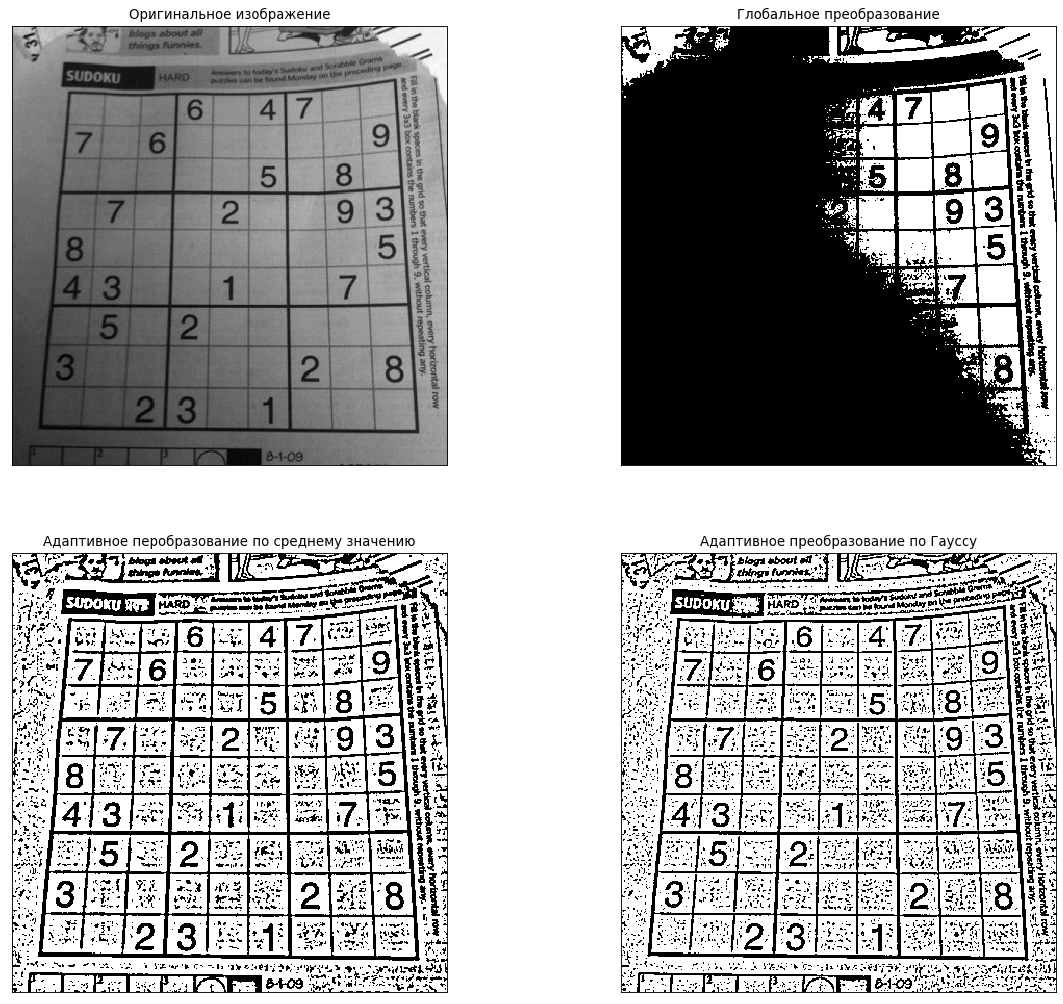

In [84]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Оригинальное изображение', 'Глобальное преобразование',
            'Адаптивное перобразование по среднему значению', 'Адаптивное преобразование по Гауссу']
images = [img, th1, th2, th3]
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Алгоритм поворота Оуена-Македона

In [85]:
from PIL import Image
import math
from numpy import matrix
from numpy import linalg

def rot_x(angle,ptx,pty):
    return 1*ptx + 0*pty

def rot_y(angle,ptx,pty):
    return -math.tan(angle/2)*ptx + 1*pty

angle = math.radians(45)
im = Image.open('sudoku.jpg')
(x,y) = im.size
xextremes = [rot_x(angle,0,0),rot_x(angle,0,y-1),rot_x(angle,x-1,0),rot_x(angle,x-1,y-1)]
yextremes = [rot_y(angle,0,0),rot_y(angle,0,y-1),rot_y(angle,x-1,0),rot_y(angle,x-1,y-1)]
mnx = min(xextremes)
mxx = max(xextremes)
mny = min(yextremes)
mxy = max(yextremes)
T = matrix([[1,0,-mnx],[-math.tan(angle/2),1,-mny],[0,0,1]])
Tinv = linalg.inv(T);
Tinvtuple = (Tinv[0,0],Tinv[0,1], Tinv[0,2], Tinv[1,0],Tinv[1,1],Tinv[1,2])
im1 = im.transform((int(round(mxx-mnx)),int(round((mxy-mny)))),Image.AFFINE,Tinvtuple,resample=Image.BILINEAR)

def rot_x(angle,ptx,pty):
    return 1*ptx + math.sin(angle)*pty
def rot_y(angle,ptx,pty):
    return 0*ptx + 1*pty
(x,y) = im1.size
xextremes = [rot_x(angle,0,0),rot_x(angle,0,y-1),rot_x(angle,x-1,0),rot_x(angle,x-1,y-1)]
yextremes = [rot_y(angle,0,0),rot_y(angle,0,y-1),rot_y(angle,x-1,0),rot_y(angle,x-1,y-1)]
mnx = min(xextremes)
mxx = max(xextremes)
mny = min(yextremes)
mxy = max(yextremes)
T = matrix([[1,math.sin(angle),-mnx],[0,1,-mny],[0,0,1]])
Tinv = linalg.inv(T);
Tinvtuple = (Tinv[0,0],Tinv[0,1], Tinv[0,2], Tinv[1,0],Tinv[1,1],Tinv[1,2])
im2 = im1.transform((int(round(mxx-mnx)),int(round((mxy-mny)))),Image.AFFINE,Tinvtuple,resample=Image.BILINEAR)

def rot_x(angle,ptx,pty):
    return 1*ptx + 0*pty
def rot_y(angle,ptx,pty):
    return -math.tan(angle/2)*ptx + 1*pty
(x,y) = im2.size
xextremes = [rot_x(angle,0,0),rot_x(angle,0,y-1),rot_x(angle,x-1,0),rot_x(angle,x-1,y-1)]
yextremes = [rot_y(angle,0,0),rot_y(angle,0,y-1),rot_y(angle,x-1,0),rot_y(angle,x-1,y-1)]
mnx = min(xextremes)
mxx = max(xextremes)
mny = min(yextremes)
mxy = max(yextremes)
T = matrix([[1,0,-mnx],[-math.tan(angle/2),1,-mny],[0,0,1]])
Tinv = linalg.inv(T);
Tinvtuple = (Tinv[0,0],Tinv[0,1], Tinv[0,2], Tinv[1,0],Tinv[1,1],Tinv[1,2])
im3 = im2.transform((int(round(mxx-mnx)),int(round((mxy-mny)))),Image.AFFINE,Tinvtuple,resample=Image.BILINEAR)

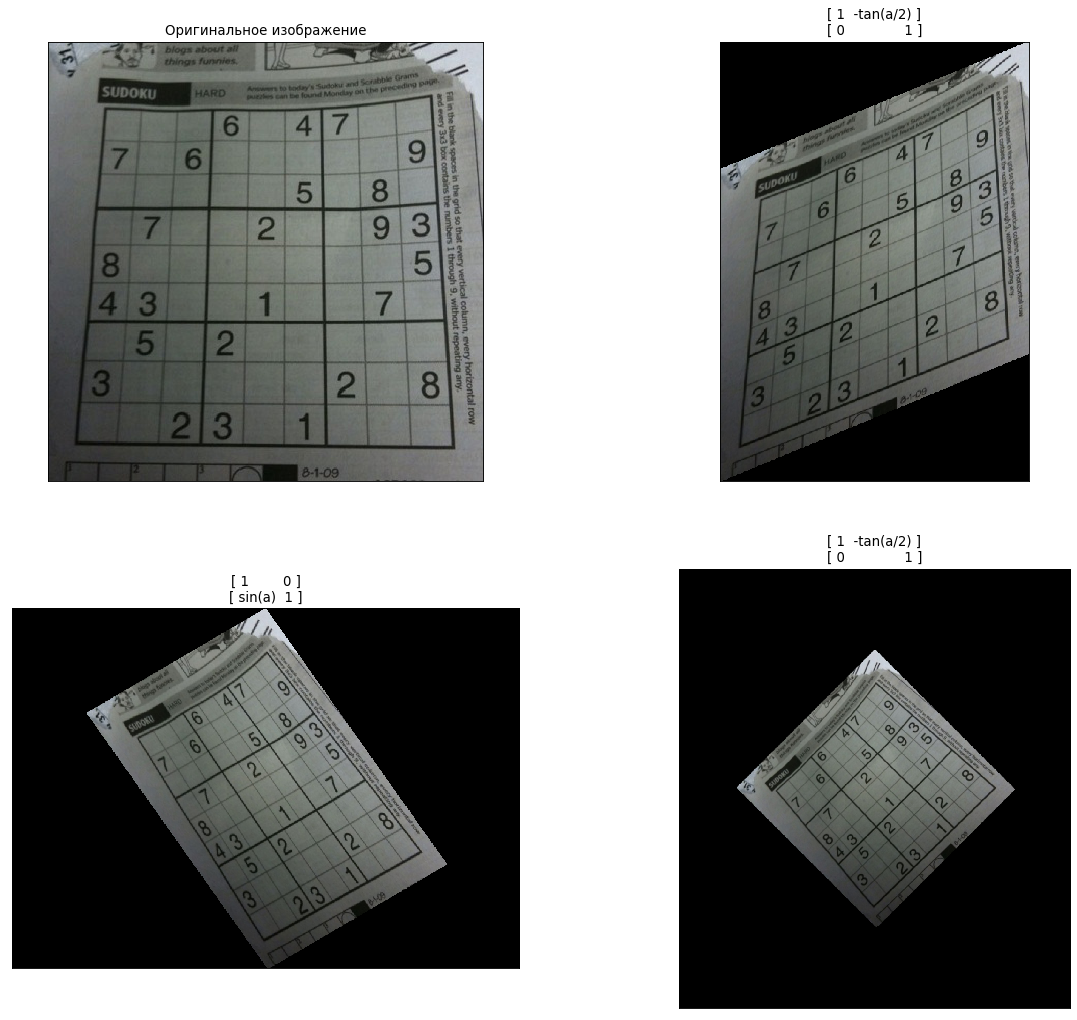

In [86]:
images = [im,im1,im2,im3]
titles = ['Оригинальное изображение', """[ 1  -tan(a/2) ]
[ 0              1 ]""",
"""[ 1        0 ]
[ sin(a)  1 ]""", """[ 1  -tan(a/2) ]
[ 0              1 ]"""]
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Детектор Канни

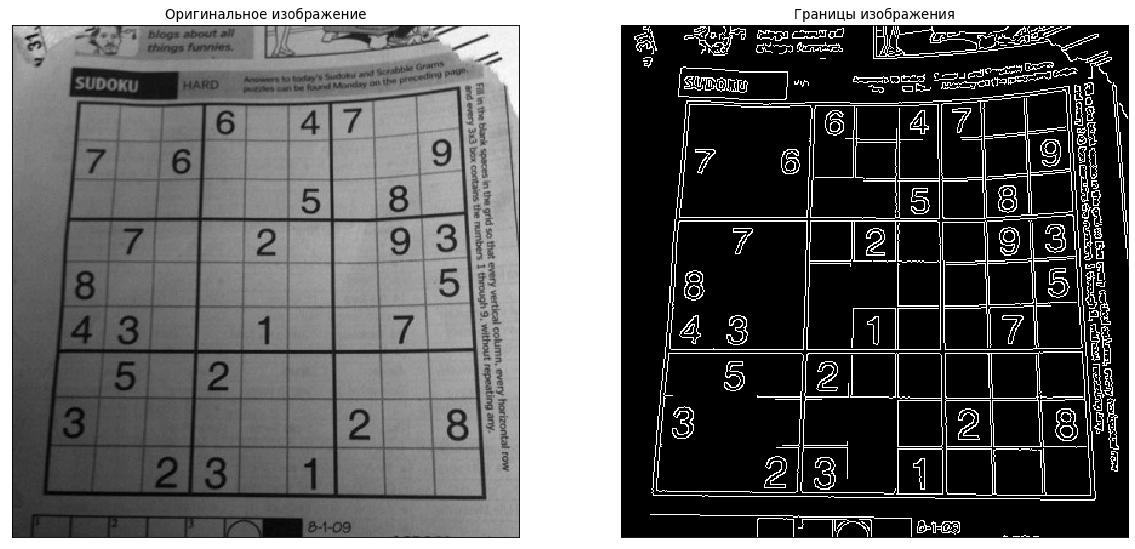

In [87]:
edges = cv2.Canny(img,100,200)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Оригинальное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Границы изображения'), plt.xticks([]), plt.yticks([])

plt.show()